Hello Yinon!

My name is Karina. Today I'm reviewing your project.

Firstly, I'll only mark mistakes, if you have them. I'll give you oppotunity to fix it yourself. Of course, I'll add details if where are any difficulties.

Good luck!

Please respond to my comments and mark changes using color codes. 
Below you will find my comments - please do not change them.
You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here)

</div>

# Description of the project

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

The base of data going back to 2016. and the goal is to get a conclussion in December 2016 is plan a campaign for 2017.

(The important thing is to get experience working with data. It doesn’t really matter whether you’re forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating such as Teen or Mature.


# Loading the data and looke on the data we have

In [2]:
!pip install sidetable

In [3]:
import pandas as pd # this will have the tools of handaling data sets
import numpy as np  # this we will need to handal numpy series in pandas enviroment
from matplotlib import pyplot as plt # this we will need for plot display
from math import factorial # this we will need for distribution and probability of large data
from scipy.stats import norm # this we will need for sample data analysys
from scipy import stats   
from IPython.display import display_html #handaling display html style
from itertools import chain,cycle #display tools
import seaborn as sns
import sys
import os
import sidetable as stb

In [4]:
sns.set_theme(style="whitegrid")

pd.set_option ('display.max_columns', None)

In [5]:
#display class in html format.

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>


Interesting functions)

In [6]:
#using try except due to local files - Linux version
try:
    #loading the files
    os.chdir(r"//home/yinonbiran/Documents") # for working localy on linux
    games_df= pd.read_csv(r"//home/yinonbiran/Documents/Integrated_project/Datasets/games.csv")
except:
    games_df = pd.read_csv("/datasets/games.csv") #working web

In [7]:
#print data samples
#first 10 rows
games_df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
#last 10 rows
games_df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [9]:
#first 10 rows
games_df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10004,Nobunaga no Yabou: Tenshoki,SAT,1995.0,Strategy,0.00,0.00,0.11,0.00,NaN,NaN,NaN
989,LEGO Star Wars III: The Clone Wars,Wii,2011.0,Action,1.01,0.60,0.00,0.15,76.0,7.7,E10+
15683,Densha de Go! Tokubetsu-hen: Fukkatsu Shouwa n...,DS,2010.0,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5592,Dance Dance Revolution Universe,X360,2007.0,Simulation,0.30,0.00,0.00,0.02,74.0,8.8,E10+
4382,NBA Live 2000,N64,1999.0,Sports,0.42,0.02,0.00,0.00,NaN,NaN,NaN
8588,Jikkyou Powerful Pro Yakyuu Basic-han 2001,N64,2001.0,Sports,0.00,0.00,0.12,0.04,NaN,NaN,NaN
12750,Kamen Rider Kabuto,PS2,2006.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14220,Red Faction II,GC,2003.0,Shooter,0.03,0.01,0.00,0.00,79.0,7.3,M
7990,The Munchables,Wii,2009.0,Action,0.17,0.00,0.00,0.01,71.0,8.2,E
7141,Conflict: Vietnam,XB,2004.0,Shooter,0.17,0.05,0.00,0.01,60.0,7.3,M


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Data loading part is really good!

# Checking the data

## Checking the column names and data types

### Checking columns names

In [10]:
list(games_df.columns)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

**No emmenent issues detected that needed to ammend the file names.
Still -I will change all the letters to lowers case - just for conveniance, and the 'name' column to 'game_name',which describe it better**

In [11]:
#using rename with srt.lower() to change all column names to lowercase
games_df.rename(str.lower, axis='columns',inplace=True)
games_df.rename({'name':'game_name'},axis='columns',inplace=True)
games_df.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great usage of str.lower()

### Check columns data type and information

In [12]:
#check the datat types
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Almost all columns type seems in order.**

**Yet we would like the 'Yaer_of_Release','Critic_Score','User_Score' should be changed.**

- 'year_of_release' - though it is a year(meaning a datetime type) in this case an int type would be appropreate.That is due to the manipulation we will do on the data whaen we wil analyze it. There the year is the number we want and that can be represented as integer only.all other date parts(mothe,day,houre) are not part of the data we need.

- 'critic_score','user_score' - thease columns type should also be transfered to float(there are numbers that are values withe a decimal point(fractions).



### Change columns data type

* The data seemes to have a broblem because of nun values and other values that made it imposible to change the data to since there are null values in the columns , pandas can not convert them to integers right away

* The solution is to ignore the value that is being changed if it doas not causes errors  .

* This number will reprisent the nan values , and will able me to fine these lines later. the negative number is chosen because there is no -1 release year ,or under 0 (all are from 0 to 100)**

* This temp solution is just to help us change the dta types and then we can see whar can we realy change the missing data with the data that we will find suitible for it**


In [13]:
#changing all the data to int and float (as needed) , in order to insert -1 as a parameter of missing values
#in the numeric columns - ignore exeptions - leave theire info as is.
games_df['year_of_release'] = games_df['year_of_release'].astype('int64', errors='ignore')
games_df['critic_score'] = games_df['critic_score'].astype('float64', errors='ignore')
games_df['user_score'] = games_df['user_score'].astype('float64', errors='ignore')

#check if data types ae in order now
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



**There seems to be a very great deel of contradictative data in the user score column that did allow pandas to change the values in the columns to float. We will check the data now for missing and odd values to see what is the case**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great idea to check it)

#### Check the unique values in the user score columne
Lets check this data to see what data stores in it and what should we put instead so we can use this data as numeric.

In [14]:
games_df.user_score.sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)


**The user_score column was the only column we could not change its value, and that is due to the 'tbs' values in it that make the all the columns' values, automaticaly as a string. So we will need to give 'tbd' a value that will reprisent the 'tbd', 

## Checking for Missing values

In [15]:
#check additional info
games_df.describe(include=['object'])

,game_name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Finding where ther are missing data

The data described above shows that there are a lot of missing data.
We will need to look on all columns to see whice has missing data and what part it takes fromm this category.

In [16]:
#checking to see if any Nan values remaind in games_df
#checking each column for the percentage of missing values

miss_val_col_check = games_df.isnull().sum().to_frame('miss_val_col_check')
miss_val_col_check['%'] = round(games_df.isnull().sum()/len(games_df)*100,3)
miss_val_col_check.sort_values(by='%', ascending=False)

,miss_val_col_check,%
critic_score,8578,51.319
rating,6766,40.479
user_score,6701,40.090
year_of_release,269,1.609
game_name,2,0.012
genre,2,0.012
platform,0,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great calculations!

Let us calculate the weight of the overall missing data fron the overall data

In [17]:
#percentage of all missing values records from the general data
len(games_df[games_df.isnull().any(axis=1)])/len(games_df)

0.5286868082560574

**CONCLUSION**

There is too much missing data and we will need to perform a fill up of most of it where we can asses the values missing.
Starts with the first more easy one 'rating', which is determined by the specific game.

#### Find the values to fill the missing data of the column

##### The 'rating' column missing values

In [18]:

#calculating the number of values in the unique for of values in the 'rating column against the 
#general data - do we have duplicates and if so maybe the duplicates have the missing rate

#aranging the 'game_name' unique values in a list, and then buld a list of each game rating
#as a dictionary. and then file the missing data according to the dictionary where there are Nan values
game_name_list = []
game_name_list = list(games_df[(games_df.rating.isnull()==False)]['game_name'].sort_values().unique())
#calculate the difference
print("general data len :",len(games_df.rating))
print("general data missing len :",len(games_df[(games_df.rating.isnull()==True)]))
print("unique data len :",len(game_name_list))
print("difference : ",(len(games_df[(games_df.rating.isnull()==False)])) - (len(game_name_list)-1))


general data len : 16715
general data missing len : 6766
unique data len : 6066
difference :  3884


**There are duplicated game lines, mayby the duplicates have the values we are missing?**

In [19]:
games_df

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Unfortunatly, we have an error here.

If you don't see this error, please, try to run it on the platform.

I suppose that's because of incorrect cols count in groupby: you've choosen dataframe with 2 columns only, and tried to used both of them as index. Please, try to add one more column - doesn't matter which one, you'll only count it)

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

Hi Karina, 

Thank you for your insight on this error. 
Yet , I have decided to drop this whole section.

In Jupiter Lab, working localy I got no errors. 

Here I do not get the resaults I wanted.And I have used another function to fill all the missing data.
    
</div>



**Nead another way to fill the missing data**
We have tried to use the duplicates in order to fill the missing values.Unfortunatly, with no luck.
Instead we will fill the missing rating to the 'Ukn'(unknown) value

In [20]:
#fill the missing rate data with Ukn for 'unknown'
games_df['rating'].fillna('Ukn',inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

That's a good idea here, it's also possible to fill all missed values in ratings col in this way)
    
It's impossible to fill missed values here because of huge amoubnd of them.

In [21]:
#Check if any missing values left - 0 means all missing data was filled
len(games_df[(games_df.rating.isnull()==True)])

0

##### Dealing with the 'critic_score' missing values

In [22]:
#Check the data fro critic_score
games_df.critic_score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

*New Ver 2*

**Since there are so many missing values and looking at the description of the data,
and we do not know the values that we need Then we can replace all missing data with -9999. which will represent the missing values that were there for future investigation.**

In [23]:
#fill the missing rate data with Ukn for 'unknown'
games_df.critic_score.fillna(-9999 ,inplace=True)

#Check if any missing values left - 0 means all missing data was filled
len(games_df[(games_df.rating.isnull()==True)])

0

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Unfortunatly, we have a problem here. 

I'd recommend to replace by obviously incorrect value (-1, 99999 etc) and filter them in your future researchs

In scores columns there are too many missed values, so we cann't fill them and save the original data properties at the same time.


<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

I have made the changes. Filling all missing values with -9999.
This number willindicate where there were missing values, and I will be able to filter them further on .

Yet , I want to investigate why we can not fill the missing values with the median? The data will not be greatly effected by it.

    
</div>


<div class="alert alert-block alert-success">

<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Thanks for your answers)

As usual, filling by median works only for a small amound of data, but here we have for about 40%. Sometimes histograms don't show the difference before and after filling, but here we can get incorrect correlations and dependences with the other columns.
    
And one more reason: sometimes missed value is meaningful by itselfs. So, this may mean that some countries/games/platforms don't use these scores and ratings at all.

In [24]:
#checking the unique values of the critic_score
games_df.critic_score.unique()

array([   76., -9999.,    82.,    80.,    89.,    58.,    87.,    91.,
          61.,    97.,    95.,    77.,    88.,    83.,    94.,    93.,
          85.,    86.,    98.,    96.,    90.,    84.,    73.,    74.,
          78.,    92.,    71.,    72.,    68.,    62.,    49.,    67.,
          81.,    66.,    56.,    79.,    70.,    59.,    64.,    75.,
          60.,    63.,    69.,    50.,    25.,    42.,    44.,    55.,
          48.,    57.,    29.,    47.,    65.,    54.,    20.,    53.,
          37.,    38.,    33.,    52.,    30.,    32.,    43.,    45.,
          51.,    40.,    46.,    39.,    34.,    35.,    41.,    36.,
          28.,    31.,    27.,    26.,    19.,    23.,    24.,    21.,
          17.,    22.,    13.])

##### Dealing with the 'user_score' missing values

In [25]:
#Changing 'tbd' score to -1, and then chenge the type of the column to float
games_df['user_score'].replace(to_replace='tbd' , value= '-1' ,inplace=True)
#change data type
games_df['user_score'] = games_df.user_score.astype('float64')
#Check the data fro user_score
games_df.user_score.describe()

count    10014.000000
mean         5.158288
std          3.717310
min         -1.000000
25%          2.400000
50%          6.900000
75%          8.000000
max          9.700000
Name: user_score, dtype: float64

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Here it's better to fill 'tbd' in the same way as nan values - we don't know the real values in both cases.

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

The 'tbd' values were changed to (-1) in Ver 1 .
    
I am sorry , but I did bot understood your meening here. What way to fill them did you ment? By replacing them with meen\median or like I 
made in VER 1 - with an obvious wron valur like -1?
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Sorry for misunderstanding)

By obviously incorrect value. I don't remember exactly, but looks like you've used different ways of replacement for missed values and 'tbd', so I asked you to replace them in the same way with -1.

*New Ver 2*

**The same as the 'critic_score' , Since there are so many missing values and looking at the description of the data, and we do not know the values that we need Then we can replace all missing data with -9999. which will represent the missing values that were there for future investigation.**

In [26]:
## New Ver 2##
#fill the missing rate data with -9999 value
games_df.user_score.fillna(-9999 ,inplace=True)

#Check if any missing values left - 0 means all missing data was filled
len(games_df[(games_df.user_score.isnull()==True)])

0

In [27]:
## New Ver 2 ##

#checking the unique values of the user_score, and the critic_score
games_df.user_score.unique()

array([ 8.000e+00, -9.999e+03,  8.300e+00,  8.500e+00,  6.600e+00,
        8.400e+00,  8.600e+00,  7.700e+00,  6.300e+00,  7.400e+00,
        8.200e+00,  9.000e+00,  7.900e+00,  8.100e+00,  8.700e+00,
        7.100e+00,  3.400e+00,  5.300e+00,  4.800e+00,  3.200e+00,
        8.900e+00,  6.400e+00,  7.800e+00,  7.500e+00,  2.600e+00,
        7.200e+00,  9.200e+00,  7.000e+00,  7.300e+00,  4.300e+00,
        7.600e+00,  5.700e+00,  5.000e+00,  9.100e+00,  6.500e+00,
       -1.000e+00,  8.800e+00,  6.900e+00,  9.400e+00,  6.800e+00,
        6.100e+00,  6.700e+00,  5.400e+00,  4.000e+00,  4.900e+00,
        4.500e+00,  9.300e+00,  6.200e+00,  4.200e+00,  6.000e+00,
        3.700e+00,  4.100e+00,  5.800e+00,  5.600e+00,  5.500e+00,
        4.400e+00,  4.600e+00,  5.900e+00,  3.900e+00,  3.100e+00,
        2.900e+00,  5.200e+00,  3.300e+00,  4.700e+00,  5.100e+00,
        3.500e+00,  2.500e+00,  1.900e+00,  3.000e+00,  2.700e+00,
        2.200e+00,  2.000e+00,  9.500e+00,  2.100e+00,  3.600e

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

I have made the changes. Filling all missing values with -9999.
This number will indicate where there were missing values, and I will be able to filter them further on .

Yet ,again ,  I want to investigate why we can not fill the missing values with the median? The data will not be greatly effected by it.

    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

My answers in the comment above)

##### Dealing with the al others missing values

**The rest of the missing value are a fraction of the data (1.6% and down)**

**We will not loose critical information if we will drop them. Theire effect due to theire part from the general data is minor and we can delete them.**

In [28]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [29]:

#delete all rows that have missing values
games_df = games_df.dropna(subset = ['year_of_release'])
games_df = games_df.dropna(subset = ['game_name'])
games_df = games_df.dropna(subset = ['genre'])

#checking to see if any Nan values remaind in games_df
#checking each column for the percentage of missing values

miss_val_col_check = games_df.isnull().sum().to_frame('miss_val_col_check')
miss_val_col_check['%'] = round(games_df.isnull().sum()/len(games_df)*100,3)
miss_val_col_check.sort_values(by='%', ascending=False)

,miss_val_col_check,%
game_name,0,0.0
platform,0,0.0
year_of_release,0,0.0
genre,0,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0
other_sales,0,0.0
critic_score,0,0.0
user_score,0,0.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your work with names, years and genres is correct!

**All mising values were either filed , or droped**
some of the missing data in marked 'tbd' ('to be determend'). These values shows that there was not yet a survay on these games or a value was not yet determend. Those values are esentioal , because they are pointing to a more recent relese of a game.

**Now we can look fr duplicates**

In [30]:
#trying to change the type of 'year_of_release' to int64
games_df['year_of_release'] = games_df['year_of_release'].astype('int64')

In [31]:
#check if the change was implemented
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Check for duplicates

We will use the len  function to rertieve the number of duplicated rows we have

In [32]:
print(len(games_df.loc[(games_df.duplicated())]))

0


**The return value was 0 - No duplicated rows were found**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great!

## Categorization

**Let us check a sample of the data , to see if we need to categorize some values or we can use them as is.**

In [33]:
#Print data sample
games_df.sample(10)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8955,Earth Defense Force 2025,X360,2013,Shooter,0.06,0.03,0.05,0.01,68.0,8.1,M
12472,Blast Lacrosse,PS,2001,Sports,0.03,0.02,0.00,0.00,-9999.0,-9999.0,Ukn
5452,Night at the Museum: Battle of the Smithsonian,DS,2009,Action,0.12,0.18,0.00,0.04,-9999.0,-1.0,E
6083,Tales of Phantasia,GBA,2003,Role-Playing,0.08,0.03,0.17,0.01,76.0,8.1,E10+
7986,Dance Dance Revolution: Disney Grooves,Wii,2009,Simulation,0.17,0.00,0.00,0.01,-9999.0,-1.0,E
11010,Singstar: Ultimate Party,PS3,2014,Misc,0.00,0.08,0.00,0.01,-9999.0,-9999.0,Ukn
16047,Accel World: Kasoku no Chouten,PS3,2013,Adventure,0.00,0.00,0.02,0.00,-9999.0,-9999.0,Ukn
2373,WWE SmackDown vs. Raw 2011,X360,2010,Fighting,0.44,0.35,0.00,0.08,75.0,7.6,T
13671,Bloody Roar Extreme,XB,2003,Fighting,0.03,0.01,0.00,0.00,61.0,8.6,T
16071,4 Play Collection - Dark Mysteries,PC,2014,Misc,0.00,0.01,0.00,0.00,-9999.0,-9999.0,Ukn


**Reminder - (-1) in  user_score means 'tbd' value**

**Lets print the unique values of the no numeric columns(exclude : game_name , 'raiting')**

In [34]:
#list of the columns to watche theire unique values
cat_list = ['platform','genre']

for cat in cat_list:
    print(cat,':\n')
    print(games_df[cat].unique())
    print(len(games_df[cat].unique()))
    print()

platform :

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
31

genre :

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
12




**We will leave the data as is for now, if we will see a need we will categorize the data ther**


## Adding value to the games_df

**We need to add a total sale in all the regions combined for each game**

In [35]:
#using a simple functionto add the regions amount
def total_sale(row):
    
    return(row['na_sales']+row['eu_sales']+row['jp_sales']+row['other_sales'])
#apply te function to the games_df table - saving to new column
games_df['total_sales'] = games_df.apply(total_sale,axis=1)

#printing the resaults
games_df.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-9999.0,-9999.0,Ukn,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-9999.0,-9999.0,Ukn,31.38


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Also possible to write like this:
    
    df['sum_col'] = df[list_of_cols_to_sum].sum(axis=1)

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

Thank you Karina, Will use it next time.
    
</div>

[****Delete this section before submiting****]

#prepare a dictionary for the paint category
paint_dict={}
paint_lst = list(car_data_gen['paint_color'].unique())

category_num = 1

#genarating the dictinary
for pnt in paint_lst:
    paint_dict[pnt]=category_num
    category_num += 1
#printing the dictionary
paint_dict

#generating the paint_category column based on paint_dict
def return_paint(row):
    
    pnt = row['paint_color']
    return(str(pnt))
    
    
def paint_cat(row):
        
    return(int(paint_dict[return_paint(row)]))

#car_data_gen['paint_category'] = car_data_gen.apply(paint_cat)

#car_data_gen

#check if it works
# Check if it works
print(paint_cat(car_data_gen.iloc[20]))
print(paint_cat(car_data_gen.iloc[45]))
print(paint_cat(car_data_gen.iloc[88]))
print(paint_cat(car_data_gen.iloc[65]))

car_data_gen['paint_category'] = car_data_gen.apply(paint_cat,axis=1)

car_data_gen

#replacing 'condition' values with category numeric values (5-new to 0-salvage), something that can be manipulated more easily
def condition_category(row):
    if row['condition'].lower() == 'new':
        return (5)
    elif row['condition'].lower() == 'like new':
        return (4)
    elif row['condition'].lower() == 'excellent':
        return (3)
    elif row['condition'].lower() == 'good':
        return (2)
    elif row['condition'].lower() == 'fair':
        return (1)
    elif row['condition'].lower() == 'salvage':
        return (0)

car_data_gen['condition'] = car_data_gen.apply(condition_category , axis=1)

car_data_gen.head()


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Is this code neccessary?

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

I forgot to delete it before I submited it. (I even wrote it in the beginning of this section) Please ignore it. It is totaly unneccessary.

    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Okay)

## Analyze prepared data

### Look at how many games were released in different years. Is the data for every period significant?

In [36]:
games_df_relesed_games_pivot = pd.pivot_table(games_df ,
                                              values=['game_name'],
                                              index=['year_of_release'] ,
                                              aggfunc='count').reset_index()
games_df_relesed_games_pivot

,year_of_release,game_name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great usage of pivot_table!

**It lookes like the there are significante changes in th release of game alon the years.**
 
 - From 1980-1990 - there is a low rate of releas , in its highest it stands at about 1.2 games per month
 - From 1991-2008 - we see almost exponential leep , that in is max it stood at about 120 new games a month!
 - from 2009-2016 - There is a decline in game releses , that is stablising around the 500-650 games per year(about 55 games per-month)


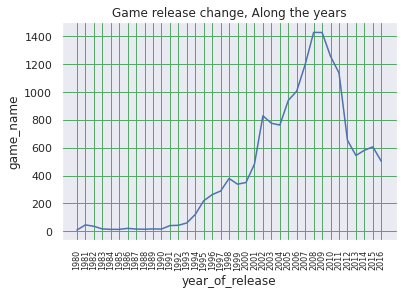

In [37]:
sns.set_style('dark')
plt.xticks(games_df_relesed_games_pivot.year_of_release ,rotation = 90 ,fontsize = 8)
plt.grid(True,color='g')
sns.lineplot(x=games_df_relesed_games_pivot.year_of_release , y=games_df_relesed_games_pivot.game_name ,data='games_df_total_sales_platform_pivot').set_title('Game release change, Along the years')
plt.show()


**The graph establishes what we saw in the data - to have three significant periods of game releases:**
 - 1980-1990
 - 1990-2008
 - 2008-2016 (the end of our dataset)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great plot and interpretations!

### Gether the release of games by Platform for each year

How the data chenged over the years, for each platform?
Let us Look at how sales varied from platform to platform.

In [38]:
#using pivot table to calculate each platform total game releases per-year
games_df_releases_platform_pivot = pd.pivot_table(games_df ,
                                              values=['game_name'],
                                                index=['platform'] ,
                                              columns = ['year_of_release'],
                                              aggfunc='count').fillna(0).reset_index(level='platform', col_level=1)

In [39]:
#change multi index column name to single index after pivot the table
#for access the information when plotting

col_lst = games_df_releases_platform_pivot.columns

col_lst_ind = pd.Index([e[1] for e in col_lst.tolist()])

#col_lst_ind
games_df_releases_platform_pivot.columns = col_lst_ind

games_df_releases_platform_pivot


,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,9.0,46.0,36.0,11.0,1.0,1.0,2.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3DS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,93.0,91.0,80.0,86.0,46.0
3,DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,20.0,8.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,0.0,0.0,0.0
5,GB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,3.0,9.0,7.0,0.0,3.0,4.0,6.0,8.0,8.0,11.0,17.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,GBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,107.0,198.0,150.0,175.0,135.0,39.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,GC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,152.0,144.0,83.0,97.0,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,GEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Did you want to use this code? Please, remove unnecessary cells or turn off Markdown mode for them)

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

    I Have removed the unneccessary cell

    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Thank you! This really makes your project clearer)

### Ploting the changes to a graph

*We see in the table that there we platforms that have stoped releasing games after a few years and some did not released any untill the early 1990s. There is a great veriasio in the game releases over the years for all platforms.*

AttributeError: module 'seaborn' has no attribute 'move_legend'

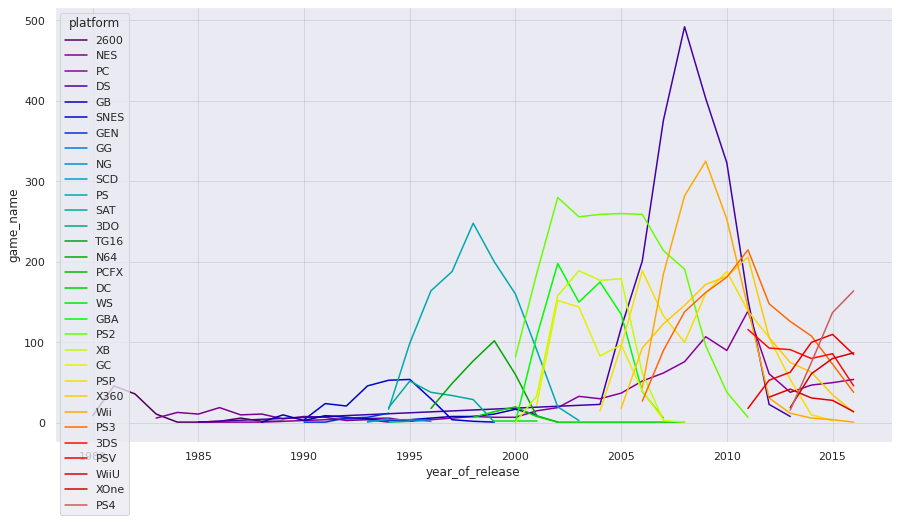

In [40]:
#Buildind a plot for the general information on game releases over the years
df=games_df.groupby(['platform','year_of_release'])['game_name'].count().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
plt.grid(True,color='k' , alpha= 0.1)
ax = sns.lineplot(data=df, x="year_of_release",y='game_name' ,hue="platform" ,palette='nipy_spectral' )
#detting legend to position outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release,rotation=90)
ax.set_title("Total game releases per platfor over the years",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I'm sure the reason of this error is different versions, but I won't try to find the correct version, if you don't mind) 

## **Some of the platforms seems to disapear before the great peek between 2005-2010.** 

**Let us look at the sales changes per platform per year.**

#### Ploting the sales per year for every platform

In [ ]:
#using pivot table to calculate each platform total sale per-year
games_df_total_sales_platform_pivot = pd.pivot_table(games_df ,
                                              values=['total_sales'],
                                                index=['platform'] ,
                                              columns = ['year_of_release'],
                                              aggfunc='sum').fillna(0).reset_index(level='platform', col_level=1)

#change multi index column name to single index after pivot the table
#for access the information when plotting

col_lst = games_df_total_sales_platform_pivot.columns

col_lst_ind = pd.Index([e[1] for e in col_lst.tolist()])

#col_lst_ind
games_df_total_sales_platform_pivot.columns = col_lst_ind

games_df_total_sales_platform_pivot



**Again we see what the former table and graph showed. That there are a lot of platformes that have been off the chart a few years after their releas**
The revenue of each year for every platfor that is no longer manufacrued, will show at some time 0 revenue.

In [ ]:

#Buildind a plot for the general information on game releases over the years
sales_df=games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
plt.grid(True,color='k' , alpha= 0.1)

ax = sns.lineplot(data=sales_df, x="year_of_release",y='total_sales' ,hue="platform" ,palette='nipy_spectral' )
#detting legend to position outside the plot
ax.set_ylim(0,(sales_df.total_sales.max()+50))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticks(sales_df.year_of_release)
ax.set_xticklabels(sales_df.year_of_release,rotation=90)
ax.set_title("Total game Total Sales per platfor over the years",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

### The search for the most profitable platforms

Which of the platforms has the greatest total sales and what its distribution based on data for each year. 

In [ ]:
#Building a z-score parameter to calculate the diviation from the mean
#for each platform. The on most profitable will have the most positive diviation

sales_df['sales_z']=(sales_df['total_sales']-sales_df['total_sales'].mean())/sales_df['total_sales'].std()
sales_df = sales_df.sort_values(by='sales_z' , ascending = False)

#Building the color schem that will make it easier to read the plot
#painting red all the negative scores we got-meaning the platform did not reach the mean sales value.

sales_df['z_color']=['red' if x<0 else 'green' for x in sales_df['sales_z']]

#Ploting a hotizontal line for this plot

plt.figure(figsize=(14,10))
ax=plt.hlines(y=sales_df.platform, xmin=0 , xmax=sales_df.sales_z, color=sales_df.z_color, alpha=0.5, linewidth=5)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

May be this function will help you:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

**We can see that the PS2 in the overall sales of all regions had the most profitable revenue so far. But this is not a permanent state since we have the PS4 that have not yet finishe their sales and other platforms that have just entered the markate**

Now let us see how did the distributon of sales of the 5 top platforms along the years.

In [ ]:
#finding the top 5 seling platforms
total_sale_df = games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

#Taking out all non-signicant data - all records befor 1995 where sales were slugish
total_sale_df = total_sale_df[total_sale_df['year_of_release'] > 1995]

#group again by platform and sum up the total_sale by platform
top5_sales = total_sale_df.groupby('platform')['total_sales'].sum().reset_index()
top5_sales = top5_sales.nlargest(5,['total_sales'])

#extracting the kist of the top 5 total saling platforms 
platform_top_sale_list = top5_sales['platform'].to_list()
platform_top_sale_list

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct choice!

In [ ]:
#Using describe to get the platform sales data
top5_platform_df = games_df[games_df['platform'].isin(platform_top_sale_list)]
top5_platform_df = top5_platform_df[top5_platform_df['year_of_release']>1995]
top5_platform_df

In [ ]:
#Checking destribution of the data for the top5 platforms

top5_platform_df.describe()

In [ ]:
top5_platform_df.describe(include='object')

In [ ]:
top5_platform_df.stb.freq(['platform'],style=True, cum_cols=True)

**Detribution of the top 5 platforms is, devided between 8000 records. That the max value of the total sales is 85 milion, and the min value of sales is 0 , but this is when the platform did not participated(mayby stoped its manufacture  or the platform was not produced at all).**

**The frequancy of the platforms is also not distributed equaly.and differ from 26% for the PS2 and DS platforms , to 15% for the rest** 

**When we look on the Mean and Median we can see that , when total sales mean is 0.59 mil and the median is about 0.2 mil , but the max value of the total sales is about 82 mil , the distribution is wide and uneaven, there for we can assume it is skewd probably positivly**

#### A histogram for these platformes 

With a histogram it eill be easier to see the distribution of the total sales

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True,color='k' , alpha= 0.1)
#ax = sns.histplot(data= 'top5_platform_df' , x=top5_platform_df.platform , y=top5_platform_df.total_sales ,stat='count')
ax = sns.histplot(data= top5_platform_df , x=top5_platform_df.total_sales,
                 hue=top5_platform_df.platform , palette='nipy_spectral')
ax.set_title('The distribution of total sales along platforms')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True,color='k' , alpha= 0.1)
#ax = sns.histplot(data= 'top5_platform_df' , x=top5_platform_df.platform , y=top5_platform_df.total_sales ,stat='count')
ax = sns.boxplot(data= top5_platform_df , x=top5_platform_df.total_sales ,
                 y=top5_platform_df.platform , orient='h' ,showfliers = False)
ax.set_title('The distribution of total sales along platforms')
plt.show()

**The boxplotes and the histogram shows the positive skew of all the platform sales. There are a lot of outliers that are pulling the mean upwards.**
The DS platform false behind when it comes to sales.with a median sales of less then 0.15 mil. 

#### We need to Find platforms that used to be popular but now have zero sales. 

What is the avarage duration a platforms ?
What is the interval between diffrent platforms to apeear, and how much time in avarage before its discarded ?

plot line over years for platforms

**there are years as we saw that the sales of platformes were not high, there wer not much of them. So in order to answere the above question , we need a period that provides us with eanogh platforms and sales.**

**The range of date that I found to be the most efective is all data past 1995. A year that we are seeing a start of an exponential increase in bothe sales and platforms**

In [ ]:
#gather all the platforms that the year of there release is highr then 1995.
#we already have a ready df for that
#we will plot for every platform its life cycle
plt.figure(figsize=(15,8))
plt.grid(True,color='k' , alpha= 0.1)

ax = sns.lineplot(data=total_sale_df, x="year_of_release",y='total_sales' ,hue="platform" ,palette='nipy_spectral' )
#detting legend to position outside the plot
ax.set_ylim(0,(total_sale_df.total_sales.max()+50))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticks(total_sale_df.year_of_release)
ax.set_xticklabels(total_sale_df.year_of_release,rotation=90)
ax.set_title("Game Total Sales per platform over the years",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

**From the graphes it seems tha there is an avarage of between 5-6 years of life cycle for a platform**

**let us see it in a table what platform that is between 1995 as a start poin up to 2015 as an rnd point(since all those who still have sales in 2016 are still active), was the most popular.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct average)

In [ ]:
games_df_temp = games_df[(games_df['year_of_release'] > 1995)&(games_df['year_of_release'] < 2015)]

platform_duration_df = games_df_temp.groupby(['platform'])['year_of_release'].agg(['min','max'])

#adding duration period , and eliminating the 0  from it  since it will indcate the last year of the platform
platform_duration_df['duration'] = platform_duration_df['max']-platform_duration_df['min']
platform_duration_df = platform_duration_df.sort_values(by='duration')
platform_duration_df = platform_duration_df[platform_duration_df['duration']!=0]
platform_duration_df

**W see that the PC platfor and the DC and PS2 platforms have lasted for more the 10 years . Yet in terms of revenue, the PC and DC platforms , did not deliver a lot. The PS2 on the other hand shows to be profitable.** 

#### Which paltform that is now running , is the most profitable yet?

Lets see all the data for platforms that are still with us at 2016.

In [ ]:
games_df_temp = games_df[(games_df['year_of_release'] == 2016)]

new_platform_tota_sales_df = games_df_temp.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()

new_platform_tota_sales_df

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True,color='k' , alpha= 0.1)

ax = sns.barplot(data=new_platform_tota_sales_df, x=new_platform_tota_sales_df.platform,
                 y=new_platform_tota_sales_df.total_sales ,palette='nipy_spectral')
#detting legend to position outside the plot
ax.set_ylim(0,(new_platform_tota_sales_df.total_sales.max()+50))
ax.set_title("Total sales for the newer 2016 platform",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()


We can clearly see that the most profitable platfor for 2016 is PS4, with revenues more then twice of its next copetitor(xOne platform), and stands at ove 80 mil for now.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great plot and explanations!

### Which platforms are growing or shrinking? Select several potentially profitable platforms.

The question is refered to platforms that are still active in 2016. So the first thing is to filter the main table to the platforms that are stil active.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I's recommend you to use longer time period, 2-5 years will be enough. By >2015 you'll get only one year, won't you?

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

Hi Karina,

sorry if the records were not clear:
    
The condition (>2015) , is used to store the data in a temp table of all platformes that are active in 2016. 

The temp table is then used for creating a list of active platforms in 2016.
    
The whole data is then taken and extracts the data where the platforms from all years, in the whole data are, in the list of platform that are active in 2016.

The data in the final table showes data from 2006 an on.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

My mistake, so sorry!

However, I'd recommend to use smaller time period that that one form 2006 - it's too long for such industry, this industry changes really fast!

So, for real predictions it's better to use 2-5 years periods in such cases) This will help to avoid old trends in data.
    
According to the task, all of the next steps are supposed to be prepared on the relevant data.
    
    Work only with the data that you've decided is relevant. Disregard the data for previous years.
    
Please, change your time period) or show me the place where you've filtered this data)

**New Ver 3**
extrsct the information from 2011-2016 on the platfroms that are still active in 2016.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2.</b> <a class="tocSkip"></a>

See it now)

Thanks!

In [45]:
#filtering the table to active games
games_df_temp = games_df[(games_df['year_of_release'] > 2015)]
#returning the unique values
lst_new_platform = list(games_df_temp.platform.unique())
#retrieve the the rows from the main table where release year is more 2010 that have the names in the list
new_platform_revenue_df = games_df[games_df['platform'].isin(lst_new_platform) & (games_df['year_of_release'] > 2010)]
#filtered tabled
new_platform_revenue_df

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-9999.0,-9999.0,Ukn,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-9999.0,-9999.0,Ukn,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-9999.0,-9999.0,Ukn,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-9999.0,-9999.0,Ukn,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-9999.0,-9999.0,Ukn,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-9999.0,-9999.0,Ukn,0.01


In [46]:
#pivot table from the filtered table
new_platform_revenue_change_df = pd.pivot_table(new_platform_revenue_df,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
new_platform_revenue_change_df.tail()


platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2012,51.36,23.22,107.36,0.00,16.19,21.71,17.56,99.74,0.00
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


In [47]:
#using the pivot table to manipulate the data and find the changes in revanue
rev_change = (new_platform_revenue_change_df-new_platform_revenue_change_df.shift(+1)).T
rev_change = rev_change.drop([1985],axis=1)
rev_change

KeyError: '[1985] not found in axis'

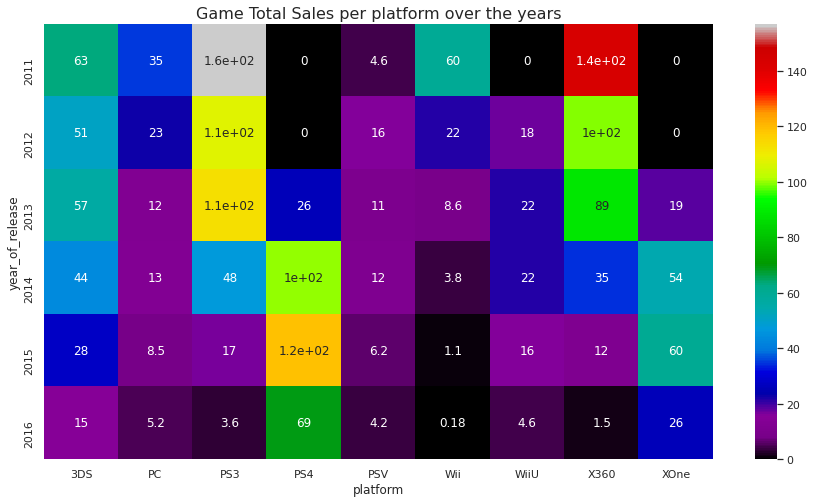

In [48]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(new_platform_revenue_change_df, cmap='nipy_spectral', annot=True)

#detting legend to position outside the plot
ax.set_title("Game Total Sales per platform over the years",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Beautiful heatmap)

#### Intermediate conclusion

**almost all the platformes shows a decrease f d=sales in 2016.**

**The only platform that shows significant increase in sales is the PS4.**

**The xOne that was released with the PS4 shows a grow up to 2016, but this year the revenue plumeted by mor the 50%**

### Are the differences in sales significant when addin the game_name parameter? What about average sales on various platforms?

In order to answere this question, we need to group all platformes by theire games and plot it to a boxplot

In [49]:
#grouping the data under platform and game_name
game_platform_df = new_platform_revenue_df.groupby(['platform','game_name'])['total_sales'].sum().reset_index()
game_platform_df.head()

,platform,game_name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07


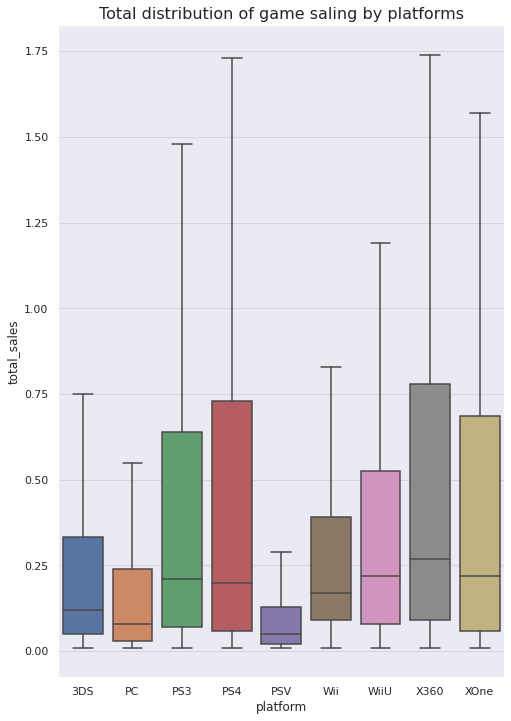

In [50]:
#Ploting a box plot to the new data
plt.figure(figsize=(8,12))
plt.grid(True,color='k' , alpha=0.1)
sns.set_style('dark')
ax = sns.boxplot(data=game_platform_df, x=game_platform_df.platform ,
                 y=game_platform_df.total_sales ,showfliers=False)
ax.set_title("Total distribution of game saling by platforms",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

#### Intermediate conclusion

**When we analize the avarage revenue of the games per platform , we see that X360 and PS3 have the most abvarage revenue, from all others platforms. Yet, If we takein consideration that the PS4 was released 7 years after the PS3, and it avarage revenue from games , is almost equal to the PS3 an the X360. And the PS3 and X360 , are already rapidly declining in total revenue, where as PS4 is growing We have to get to the conclusion that , if we would like to ivest is some platform games, then the PS4 is the platform to go to.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct explanations!

### How does a user and professional reviews ,affect sales for one popular platform?

Does the rating have an influance on the sales?

In [51]:
## New Ver 2 ##

#Gethering the data in two tables - (-1) and (-9999) are representing the Null and tbd values we established earlier.
user_score_salea_PS3_df=games_df[(games_df.platform=='PS3')&(games_df['user_score']!=(-9999))&(games_df['user_score']!=(-1))][['total_sales','user_score']]

critic_score_salea_PS3_df=games_df[(games_df.platform=='PS3')&(games_df['critic_score']!=(-9999))&(games_df['critic_score']!=(-1))][['total_sales','critic_score']]
user_score_salea_PS3_df = user_score_salea_PS3_df.round(2)
critic_score_salea_PS3_df = critic_score_salea_PS3_df.round(2)
user_score_salea_PS3_df

,total_sales,user_score
16,21.05,8.2
34,13.79,5.3
37,13.33,3.2
41,12.63,6.4
54,10.70,7.5
...,...,...
15567,0.02,6.8
15649,0.01,7.9
15742,0.02,5.0
16146,0.01,6.9


In [52]:
critic_score_salea_PS3_df

,total_sales,critic_score
16,21.05,97.0
34,13.79,83.0
37,13.33,88.0
41,12.63,88.0
54,10.70,84.0
...,...,...
15649,0.01,82.0
15742,0.02,50.0
15880,0.01,38.0
16146,0.01,73.0


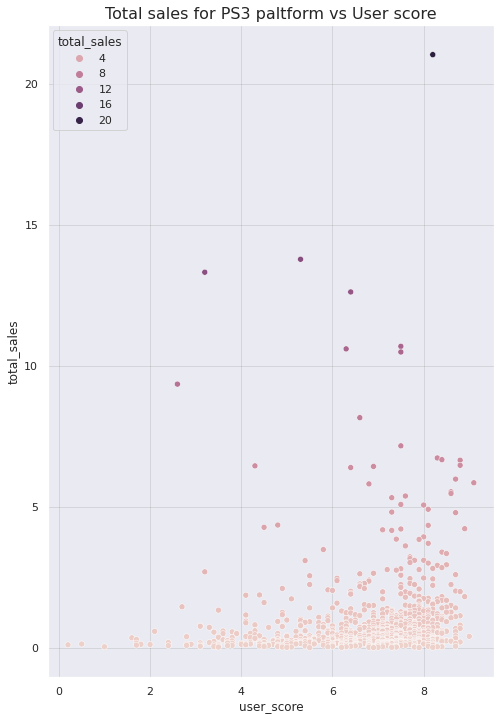

In [53]:
## New Ver 2##

#build scatter plots for both tables
fig,ax=plt.subplots(figsize=(8,12))
#plt.figure(figsize=(8,12))
plt.grid(True,color='k' , alpha=0.1)
sns.set_style('dark')
#user_score plot
ax = sns.scatterplot(data=user_score_salea_PS3_df, x=user_score_salea_PS3_df.user_score ,
                           y=user_score_salea_PS3_df.total_sales,
                            hue = user_score_salea_PS3_df.total_sales)

ax.set_title("Total sales for PS3 paltform vs User score",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

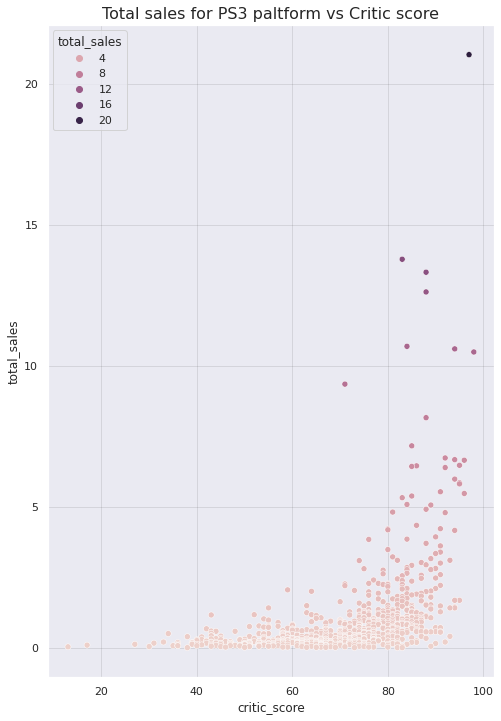

In [54]:
##New Ver 2##

#build scatter plots for both tables
fig,ax=plt.subplots(figsize=(8,12))
#plt.figure(figsize=(8,12))
plt.grid(True,color='k' , alpha=0.1)
sns.set_style('dark')

#critic_score plot
sns.scatterplot(data=critic_score_salea_PS3_df, x=critic_score_salea_PS3_df.critic_score ,
                           y=critic_score_salea_PS3_df.total_sales,
                           hue = critic_score_salea_PS3_df.total_sales,)

ax.set_title("Total sales for PS3 paltform vs Critic score",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I don't think we need different colors for each point here, it's not informative and makes the plot messy, PLease, try to use simple scatter plot with one color.

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>


Sorry for the mess. 

I worked localy on the jupyter lab platform.
There all plots and scatterplots did not look like that it was much orgenized.

Any way I changed the plots so they will fit here better.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Thank you!

Really looks better now)

In such cases I'd recommend to check libraries versions here on the platform and use it localy or to check your notebook here)

**Intermediate coclusion**

- The correlation between users_score or critic score, to the total sale does not looks strong. You cn see values of sales scatering all over. 
- The higher the score, we see more sales bu just to a point and then the sales stay around the same amount.

In [55]:
#now let us check it mthematicaly
def score_effect(platform,score):
    
    print('correlation report between {} and sales is :\n'.format(score))
    
    correlation = platform.corr(method='pearson')
    print(correlation)
    
    
score_effect(user_score_salea_PS3_df,'user')
print()
score_effect(critic_score_salea_PS3_df,'critic')

correlation report between user and sales is :

             total_sales  user_score
total_sales     1.000000    0.128416
user_score      0.128416    1.000000

correlation report between critic and sales is :

              total_sales  critic_score
total_sales      1.000000      0.432759
critic_score     0.432759      1.000000


**Intermediate conclusion**

If we look at the avarage user score and the avarage critic score we see that there is a correlation between them and the sales , but when we see the correlation matrics, we can see that the correlaton is not that strong. 


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct calculations and interpretations!

However, I'm sure that the results will change a little bit after corrections. Please, don't forget to check them one more time.

### How does the games distrubute in all other platfors?

We need to make group up the sales by of games ,that were checked for PS3 ,and see how does the sales distribution there on other platformes.

In [56]:
#group all data by platform and game name, But I want relevent data 
#so I will use games_df_temp that hase platform and game that are still activr in 2015.
games_sales_df = games_df_temp.groupby(['platform','game_name'])['total_sales'].sum().reset_index()

#check the distribution of the games by sales by platform
games_sales_df = games_sales_df.sort_values(by = 'total_sales')
games_sales_df

,platform,game_name,total_sales
501,XOne,ZombiU,0.01
302,PSV,7'scarlet,0.01
80,PC,Ride 2,0.01
312,PSV,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,0.01
77,PC,Quantum Break,0.01
...,...,...,...
154,PS4,Battlefield 1,4.07
160,PS4,Call of Duty: Infinite Warfare,4.47
288,PS4,Uncharted 4: A Thief's End,5.39
31,3DS,Pokemon Sun/Moon,7.14


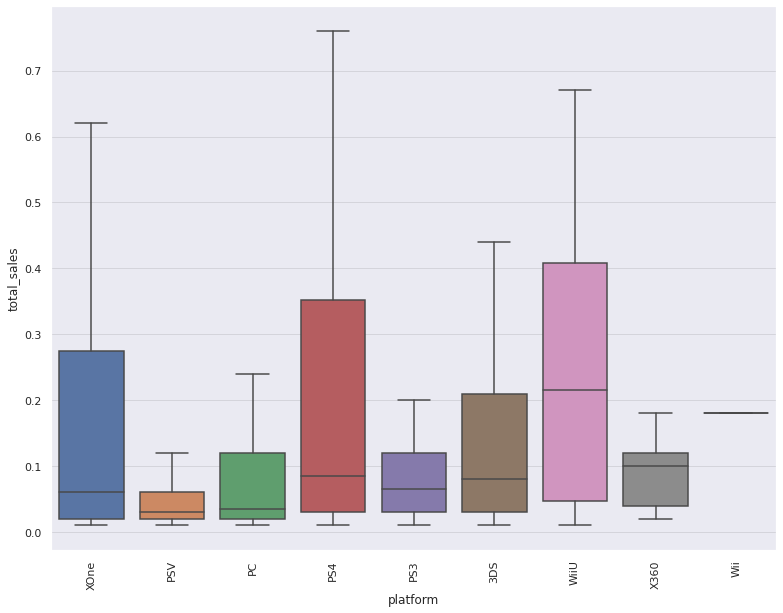

In [57]:
#building a box plot to see sales of the games per platforme
fig,ax=plt.subplots(figsize=(13,10))
plt.grid(True,color='k' , alpha=0.1)
sns.set_style('dark')
ax = sns.boxplot(x='platform',y='total_sales',data=games_sales_df,showfliers=False)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

#### Over view

**The data we see combind with former data we have here, Sujests that although it seems that there are a few platform that soll more games from PS4 , The same platfroms are now in decline in matter of revenue. 
Only PS4 platform is now rising, and it sims that he has a few yewrs befor its decline. And as we see hear the start point of it is higer then a few. Also though its outliers lay the farthest, the median of it is still high.Therfore eill genarate more revenue per game then other. Also ,The PS4 has a few more years befor it will begin its decsent, So we can get more revenue from it in general. All Other platforms show a decline in sales and many lokks like they will not last the year to come.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Also possible to choose one game and study it's sales on different platforms.

### Game distribution by Ganre

Let see waht genre gives th most revenue.
In this case the genre does not have a time encloser, this because it is spread through platforms and years. So we can use the general data to see its revenue distribution.

In [58]:

#grouping the revenue by genre
genre_sales_df = games_df.groupby(['genre'])['total_sales'].sum().reset_index()
genre_sales_df = genre_sales_df.sort_values(by='total_sales', ascending=False)

genre_sales_df

,genre,total_sales
0,Action,1716.52
10,Sports,1309.67
8,Shooter,1041.36
7,Role-Playing,931.08
4,Platform,825.55
3,Misc,790.29
6,Racing,723.49
2,Fighting,442.66
9,Simulation,387.96
5,Puzzle,239.89


In [59]:
#general description of the data
genre_sales_df.describe()

,total_sales
count,12.000000
mean,734.530833
std,472.551171
min,172.570000
25%,350.942500
50%,756.890000
75%,958.650000
max,1716.520000


##### Plot a bar chart for the genres

Let us put it in visualization

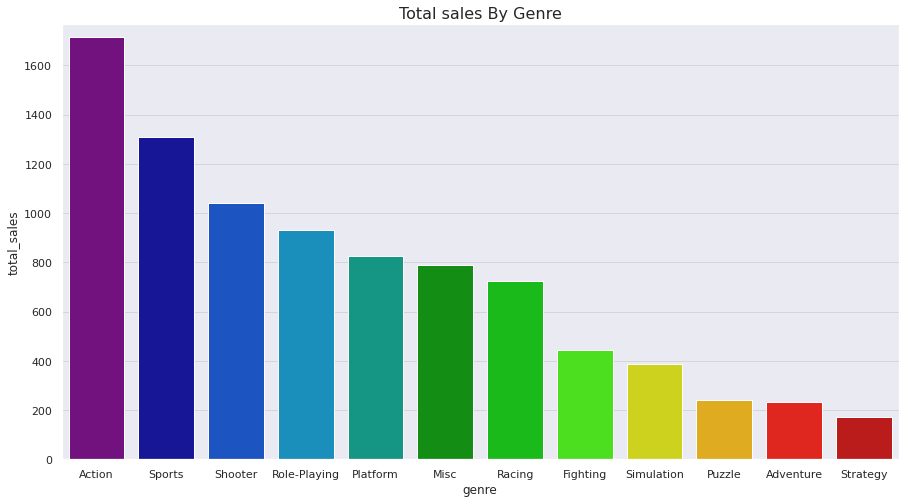

In [60]:
plt.figure(figsize=(15,8))
plt.grid(True,color='k' , alpha= 0.1)

ax = sns.barplot(data=genre_sales_df, x=genre_sales_df.genre,
                 y=genre_sales_df.total_sales ,palette='nipy_spectral')
#detting legend to position outside the plot
ax.set_ylim(0,(genre_sales_df.total_sales.max()+50))
ax.set_title("Total sales By Genre",fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.show()

**From all the data we can see that the Action genre genarates the most revenue , where sports is after and shooting games are in third place** 

**The mean and median are close to each other and we can expect that the data is distributed normaly. The bar chart itself shows a modarate decline , moving from genre to genre. and thereare no two groups for those who revenue way above the mean and another way below the mean.**


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct calculations and a really colorful plot) Great work!

## Creating user profile for each region

Let see the behavior of population based on region.

For each region (NA, EU, JP), determine:

 - The top five platforms. 
 
 - variations in their market shares from region to region.

 - The top five genres.

 - Do ESRB ratings affect sales in individual regions?


### The top platforms

In [61]:
#retreving the top 5 saling platforms
#NA region
na_sales_df = games_df.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()

#EU region
eu_sales_df = games_df.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()

#JP region
jp_sales_df = games_df.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()

display_side_by_side(na_sales_df,eu_sales_df,jp_sales_df,titles=cycle(['NA_Sals','EU_Sales','JP_Sales']))

,platform,na_sales
28,X360,595.74
16,PS2,572.92
26,Wii,486.87
17,PS3,390.13
4,DS,380.31
,platform,eu_sales
16,PS2,332.63
17,PS3,327.21
28,X360,268.32
26,Wii,258.32


**We can see that the platforms very from region to region**

 - NA region top 3 are: X360 , PS2 and Wii
 - EU region top 3 are: PS2 , PS3 and X360
 - JP region top 3 are: DS , PS and PS2


#### Ploting the results

*New Ver 2*

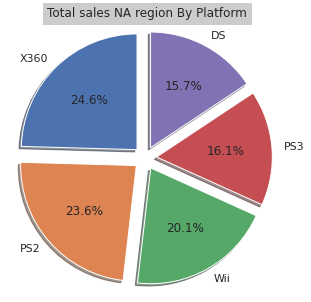

In [62]:
#Ploting a pie chart for each region 

explode = (0.1, 0.1, 0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#NA pie chart
ax1.pie(na_sales_df['na_sales'] , explode=explode, labels= na_sales_df['platform'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales NA region By Platform",bbox={'facecolor':'0.8', 'pad':5})




plt.show()

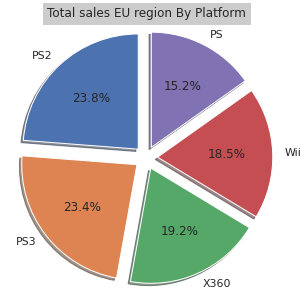

In [63]:
fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#EU pie chart
ax1.pie(eu_sales_df['eu_sales'] , explode=explode, labels= eu_sales_df['platform'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales EU region By Platform",bbox={'facecolor':'0.8', 'pad':5})

plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

"ax1" I suppose?
    
This code works the same, but it's easier and without ax and subplots:
    
    plt.figure(figsize=(5, 5))
    plt.pie(jp_sales_df['jp_sales'] , explode=explode, labels= jp_sales_df['platform'] , autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Total sales JP region By Platform",bbox={'facecolor':'0.8', 'pad':5})

    plt.show()

**New ver 3**

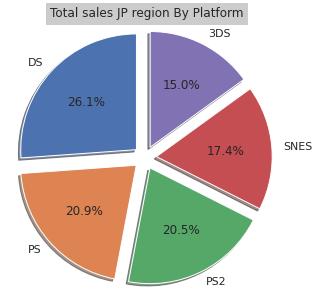

In [65]:
plt.figure(figsize=(5, 5))
plt.pie(jp_sales_df['jp_sales'] , explode=explode, labels= jp_sales_df['platform'] , autopct='%1.1f%%',
            shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales JP region By Platform",bbox={'facecolor':'0.8', 'pad':5})

plt.show()

<div class="alert alert-block alert-info">
<b>Student Comment Ver 3</b> <a class="tocSkip"></a>


Sorry for I missed that part, 
    corrected it .
    Thank you.
    I worked with jupiter lab localy and used a lot of examples from different sites to plot the data, so this is whay there is a variance in all the versions. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2.</b> <a class="tocSkip"></a>

Now it's great)

### Percentage of each region from the markat

How much each region occupies from the whole markat?

In [67]:
#For each region we will calculate its part from the whole markate
for rg in ['na','eu','jp']:
    s = '_sales'
    region = rg+s
    share = (games_df[region].sum()) / (games_df['na_sales'].sum()+games_df['eu_sales'].sum()+games_df['jp_sales'].sum())
    print ('{} region share of the markate is : {:.1%}'.format(str(rg).upper(),float(share)))
    
    


NA region share of the markate is : 54.1%
EU region share of the markate is : 29.9%
JP region share of the markate is : 16.1%


**We can see that the largest share of the markate is North America, Which is responsible for more the 50% of the revenue**

In [68]:
#retreving the top 5 saling Genres in each region
#NA region
na_sales_genre_df = games_df.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()

#EU region
eu_sales_genre_df = games_df.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()

#JP region
jp_sales_genre_df = games_df.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()

display_side_by_side(na_sales_genre_df,eu_sales_genre_df,jp_sales_genre_df,titles=cycle(['NA_genre Sales','EU_genre Sales','JP_genre Sales']))

,genre,na_sales
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57
,genre,eu_sales
0,Action,510.99
10,Sports,371.33
8,Shooter,314.52
6,Racing,234.49


#### Ploting the resaults

*New Ver 2*

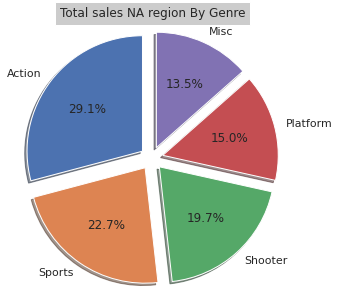

In [69]:
#Ploting a pie chart for each region 

explode = (0.1, 0.1, 0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#NA pie chart
ax1.pie(na_sales_genre_df['na_sales'] , explode=explode, labels= na_sales_genre_df['genre'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales NA region By Genre",bbox={'facecolor':'0.8', 'pad':5})




plt.show()

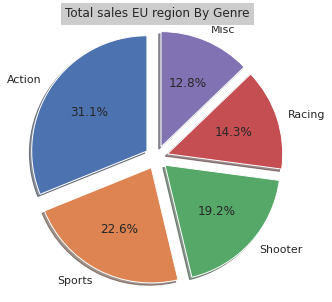

In [70]:
fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#EU pie chart
ax1.pie(eu_sales_genre_df['eu_sales'] , explode=explode, labels= eu_sales_genre_df['genre'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales EU region By Genre",bbox={'facecolor':'0.8', 'pad':5})

plt.show()

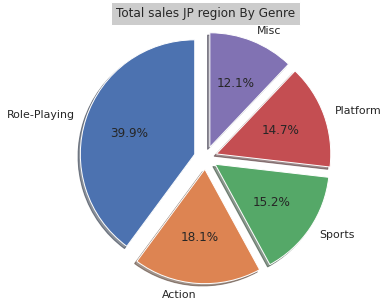

In [72]:
fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#JP pie chart
ax1.pie(jp_sales_genre_df['jp_sales'] , explode=explode, labels= jp_sales_genre_df['genre'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales JP region By Genre",bbox={'facecolor':'0.8', 'pad':5})

plt.show()



**In the NA and EU regions it seems that the behaviore of the users is the same.**

 - Bothe NA and EU users placed the : Action , sport and shooting genre in the first places
 - In JP region on the othe way , Action and sports came in 2nd and 3rd, and in the first place Role-playing catches the top with sales that doubles the genre after it.

### Do ESRB Ratings effect sales for individule region ?

Lets inspect each region sales by groupin it under ESRB rating.


In [73]:
#retreving the sales under Esrb in each region
#NA region
na_sales_Esrb_df = games_df.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)

#EU region
eu_sales_Esrb_df = games_df.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)

#JP region
jp_sales_Esrb_df = games_df.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)

display_side_by_side(na_sales_Esrb_df,eu_sales_Esrb_df,jp_sales_Esrb_df,titles=cycle(['NA_ESRB Sales','EU_ESRB Sales','JP_ESRB Sales']))

,rating,na_sales
1,E,1274.24
8,Ukn,1225.84
7,T,747.60
5,M,742.89
2,E10+,345.50
4,K-A,2.56
3,EC,1.53
0,AO,1.26
6,RP,0.00
,rating,eu_sales


#### Ploting the resaults

*New ver 2*

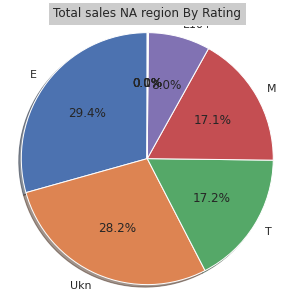

In [74]:
#Ploting a pie chart for each region 

explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#NA pie chart
ax1.pie(na_sales_Esrb_df['na_sales'] , labels= na_sales_Esrb_df['rating'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales NA region By Rating",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

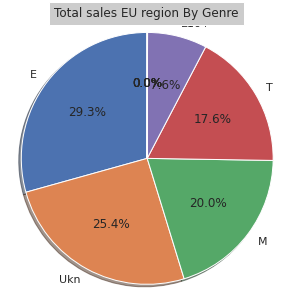

In [75]:
fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#EU pie chart
ax1.pie(eu_sales_Esrb_df['eu_sales'] , labels= eu_sales_Esrb_df['rating'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales EU region By Genre",bbox={'facecolor':'0.8', 'pad':5})

plt.show()

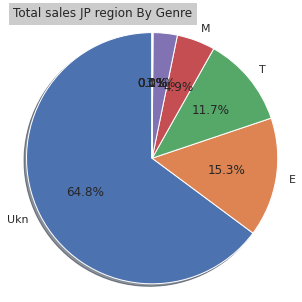

In [77]:
fig1, ax1 = plt.subplots(1 , figsize = (5,5) )
#JP pie chart
ax1.pie(jp_sales_Esrb_df['jp_sales'] , labels= jp_sales_Esrb_df['rating'] ,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total sales JP region By Genre",loc='left',bbox={'facecolor':'0.8', 'pad':5})

plt.show()


**It lookes that the best sales is the one that calls for all audiances.**

**We see that the higher sales comes for the E ratings(the Unk is the unknown ratings we got with the original data set)**

**So it seems that people like to play with as much people as they can, and the way to do that is to buy games that are suitable for all (Just my conjunction) :-)**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Really like your conclusions:)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please, try to add plots for parts 8.1-8.3. For e.x, pie-charts will be good)

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

Added Pie charts for all tables.

</div>

## Cecking The hypotheses

The are two hypotheses in order:

    H0 - Average user ratings of the Xbox One and PC platforms are the same - we need to fail to reject
    Ha - Average user ratings of the Xbox One and PC platforms are different- if we rejected the H0
    
    Ha - Average user ratings for the Action and Sports genres are different.- we need to reject H0
    H0 - Average user ratings for the Action and Sports genres are the same. - we will fail to reject it.
    

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great that you've added both hypothesises for each test!

Traditionally, they are labeled as H0 (null hypothesis) and H1 (alternative)

In [78]:
#define veriable to hold the hypotheses
#hypotheses 1
H01 = 'Average user ratings of the Xbox One and PC platforms are the same'
Ha1 = 'Average user ratings of the Xbox One and PC platforms are different'

#hypotheses 1    
H02 = 'Average user ratings for the Action and Sports genres are the same.'
Ha2 = 'Average user ratings for the Action and Sports genres are different.'

In [79]:
#define a function to check the values with T-test
def t_ttest(game_sample1,game_sample2):
    
    #T-test for the two samples of the surf plan vs the ultimate one 
#Is there is a conecction less then 0.05 then the H0 can be disproofed 

    alpha = 0.05

    p_value = stats.ttest_ind(game_sample1,game_sample2)
    print('The pvalue of {} vs {} datasets is :{} '.format(game_sample1.name ,game_sample2.name ,p_value.pvalue))

    if p_value.pvalue < alpha:
        print('We Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5% , The Ha is now replacing H0' )
        return(1)
    else:
        print( "We Fail to Reject H0: We don't have enough evidence to say The posibility of average diferance of sample 1 is not equal to average difference of sample 2. H0 remains") 
        return(0)

### Hypotheses no.1

    *H0* - Average user ratings of the Xbox One and PC platforms are the same - we need to fail to reject
    
    *Ha* - Average user ratings of the Xbox One and PC platforms are different- if we rejected the H0

**To check yhis Hypotheses we will need samples of xbox and pc platforms

In [80]:

#Preparing the sample of xBox of user_score - without null and 'TBD' which i coverted to -1
xb_game_df = games_df[(games_df.platform =='XB')&(games_df.user_score!=-9999)&(games_df.user_score!= -1)]['user_score'].astype(float)
xb_game_df

78       8.2
129      8.6
466      8.5
508      8.7
569      8.5
        ... 
15989    8.7
16037    6.0
16194    7.3
16203    3.0
16455    7.0
Name: user_score, Length: 571, dtype: float64

In [81]:
#check 
xb_game_df.unique()

array([8.2, 8.6, 8.5, 8.7, 9.2, 6.7, 6.1, 9.1, 7.6, 8.9, 6.9, 7.5, 7.8,
       7.4, 7.2, 8.1, 8.8, 8.3, 7.1, 5.8, 8. , 5.1, 9. , 8.4, 7.9, 6.4,
       4.7, 5.9, 7.7, 5.7, 5.2, 7.3, 6.6, 7. , 6.5, 9.3, 5.4, 6. , 2.4,
       4.4, 6.2, 4.3, 5.3, 6.8, 2.8, 5.5, 6.3, 5. , 3. , 2. , 4.1, 4. ,
       5.6, 3.6, 0.5, 4.6, 3.4, 2.5, 1.5, 2.7, 1.2, 3.7, 4.5, 4.8])

In [82]:

#Preparing the sample of xBox of user_score - without null and 'TBD' which i coverted to -1
pc_game_df=games_df[(games_df.platform =='PC')&(games_df.user_score!=-9999)&(games_df.user_score!= -1)]['user_score'].astype(float)
pc_game_df

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 755, dtype: float64

In [83]:
pc_game_df.unique()

array([7.6, 7.3, 4. , 8.2, 9.1, 7.9, 8.1, 8. , 7.8, 3.9, 6.6, 5.9, 7.5,
       9. , 8.3, 5.6, 8.6, 4.8, 2.5, 5.3, 8.7, 4.2, 7. , 2.2, 6. , 5.4,
       8.4, 8.5, 6.7, 6.9, 8.9, 5.5, 6.2, 5.7, 8.8, 7.4, 6.8, 9.3, 6.1,
       6.5, 7.7, 4.5, 3.6, 3. , 6.4, 5.8, 4.7, 4.6, 5.2, 2.1, 6.3, 3.7,
       5. , 3.5, 3.3, 7.1, 4.4, 3.2, 4.3, 7.2, 4.9, 3.8, 4.1, 2.9, 5.1,
       3.4, 2.8, 3.1, 9.2, 1.4, 2.4])

#### Checking the hypotheses 

If the p-value will be greater then the value returned , then the H0 will remain the rulling hypotheses.
Else, we will announce that Ha is the new rulling assumption.

In [84]:

# passing the two samples to the function
hyp = t_ttest(xb_game_df,pc_game_df)
#Here if we reject H0 (avarage is equal in both samples), automaticaly Ha is approoved and vise versa
print('\nConclusion:')
if hyp == 1:
    print(Ha1)
elif hyp == 0:
    print(H01)

The pvalue of user_score vs user_score datasets is :4.435048034276628e-08 
We Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5% , The Ha is now replacing H0

Conclusion:
Average user ratings of the Xbox One and PC platforms are different


**The H0 hypotheses was rejected and now we can assum that Average of user ratings, of the Xbox One and PC, platforms are different**

### Hypotheses no.2

    *H0* - Average user ratings for the Action and Sports genres are different.- we need to reject H0
    
    *Ha* - Average user ratings for the Action and Sports genres are the same. - we will fail to reject            it.

This Hypotheses will be consider true if the alternative (meaning if we get p-value<0.5), will be rejected.
**To check yhis Hypotheses we will need samples of Sports genre and Action genre

In [85]:


#prepare the Action sample of user_score - without null and 'TBD' which i coverted to -1
Action_game_df=games_df[(games_df.genre =='Action')&(games_df.user_score != -9999)&(games_df.user_score!= -1)]['user_score'].astype(float)
Action_game_df

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1796, dtype: float64

In [86]:
#check the data
Action_game_df.unique()

array([8.2, 9. , 8.1, 8.7, 8.5, 8.3, 7.9, 7.5, 6.6, 7.6, 8.8, 6.9, 9.4,
       9.1, 9.2, 8.9, 8.6, 6.7, 6.1, 8. , 5.4, 7.7, 8.4, 9.3, 7.2, 6.3,
       4.9, 7.8, 6.8, 4.1, 7.4, 7. , 5.6, 6.4, 6.5, 4.5, 5.1, 7.3, 5.7,
       3.5, 7.1, 4.2, 5.8, 4.8, 6. , 6.2, 5. , 5.5, 5.9, 5.2, 2.8, 4.3,
       5.3, 1.6, 4.6, 3.4, 3. , 3.7, 4.7, 4. , 3.6, 4.4, 3.9, 3.2, 3.8,
       3.3, 0.3, 1.7, 2.9, 1.2, 2.5, 2.3, 2. , 3.1, 9.5, 1.5, 2.2, 2.4])

In [87]:

#prepare the Action sample of user_score - without null and 'TBD' which i coverted to -1
Sports_game_df=games_df[(games_df.genre =='Sports')&(games_df.user_score!=-9999)&(games_df.user_score!= -1)]['user_score'].astype(float)
Sports_game_df

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16450    4.5
16518    1.4
16528    6.9
16546    9.5
16643    6.6
Name: user_score, Length: 1081, dtype: float64

In [88]:
Sports_game_df.unique()

array([8. , 7.7, 7.4, 4.3, 5. , 5.7, 9.2, 7.9, 8.2, 7.5, 8.9, 4.5, 4.2,
       7.8, 8.7, 6.7, 9.1, 7.6, 8.5, 4.4, 5.9, 6.5, 6.3, 7.2, 9. , 6.8,
       5.8, 6.1, 8.6, 3.2, 5.5, 8.1, 7. , 4.9, 5.4, 6.4, 8.8, 6.2, 6.9,
       5.6, 5.2, 7.1, 4.1, 6. , 8.4, 8.3, 3. , 2.9, 2.7, 3.5, 2. , 5.1,
       7.3, 6.6, 5.3, 4.6, 3.1, 3.3, 4. , 3.6, 2.1, 3.8, 4.8, 2.4, 2.8,
       1.8, 1.7, 3.9, 1.6, 1.1, 3.7, 9.5, 4.7, 1.5, 3.4, 0.7, 9.4, 0.2,
       1.4, 9.3, 1.9])

In [89]:
# passing the two samples to the function
hyp = t_ttest(xb_game_df,pc_game_df)
#Here if we reject H0 (avarage is equal in both samples), automaticaly Ha is approoved and vise versa
print('\nConclusion:')
if hyp == 0:
    print(H02)
elif hyp == 1:
    print(Ha2)

The pvalue of user_score vs user_score datasets is :4.435048034276628e-08 
We Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5% , The Ha is now replacing H0

Conclusion:
Average user ratings for the Action and Sports genres are different.


**The H0 hypotheses was rejected and now we can assum that Average of user ratings, of the Action genre and Sports genre, are different**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your work with tests is correct!

#### Conclusion for the hypotheses tests

**We had two Hypotheses that we needed to check.**
 
 - the first one is to was to check the avarage of user rating, betwin Xbox an PC platforms
 - The secon one was to check user scot avrage between two game genre :Action and Sport
 - In both cases, I made the null Hypotheses, as the equality between two sets
 - We have made samples for each Hypotheses and put them to t-test.
 - I have uses a threshold level of 5% , wich below it we will reject the null hypotheses.
 - The threshold was sufficiant for the data we had, that was big enough to set the threshold to 5% 
 - Finaly we got the resaults that rejected the firs one , but confirmed the second on(that needed the null hypotheses to be rejected in order to stay true)
 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pretty good conclusions)

## Overall conclusion

**We started with the data we got from the client, and with it there was a task:**

 - Identify patterns that determine whether a game succeeds or not.

The data was not clean , and had a lot of missing values, That we made the effort to fill as much of it as we can.

We cleand the data from disturbances, and started manipulatin the diffrent data categories, to see if we recognize a pattern for a sucsesful games.
The ploting of graphes showed us some paterns that we will no conclude.



### Our Findings

 - Firs - we checked the platforms of theire patern
 - We found that every few years a new platform is rlease and anothe dies.
 - The life span of a gaming platform is about 10 years.
 - For each platform there is a life cycle that stats in the firs 2-3 years of climbing in salles.
 - Then we have about 6-7 years of staying in aproximatly the same lever it reached earlier.
 - Thelast stage is the "dieying" stage, mostly it comes in conjuction of the entrance of the new version of this platfom or a new other new platform.
 - In this period there is a quick decline that take 1-2 Years, and then it does notapear any more.
 
 - Second - we chaked the games 
 - We found that there are very popular genres some more then others
 - There are diffrances in the game sales between North americ , Europe and Japan.
 - Most game sales are made in NA. (More then 50%)
 - The Most popular genres(Action and Sports) are the same in NA and EU, and are placed 2nd and 3rd in JP.
 - Third : we checked the influance of both user score and critic score , on game sales.
 - We found no direct conenction , the onnection that is there is very faint and it seems that that there is little influance of user and critic scoring on the game sale.
 
 - Forth - we checked the ERSB rating and its destribution along the games.
 - Our conclusion was that games that are suitible to all. The other ratings fall behind in sales.
 

## Final conclusion and recomendations

 - We were asked to find a patern that will give a way to asses if a game will suceed or fail
 
 **After checkin the data we can recomand as follows**
 
  - First - since every game is played on a platform - we need to fine the platformes that still have a life span of mor the 6 years(platforms that the max year of release was up to 4 years ago)
  - The platform sales must show incline for a period of the first two years.
  - The platform that we found to be the best is the PS4 that is incline with sales and in the right range of years.
  
  - Second - the game itself.We would like it to be suitble to the chosen platform
  - The game should be of the Action or Sports kind
  - The game ESRB rating should be , E(suitible for every one).
  - The markate that it should be pointing is the NA and EU that are both consist mor then 70% of the markate.
  
*I hope this report will help your decission*
**Thank you for your time**

 <div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This conclusion is really good! It was a huge research)
    
However, some of your results may change after corrections. Please, dont't forget to check them one more time)

<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

    
Thank you for sending your project. Your project is really good!

I especially liked your plots! Your code is also good, it's clear and easy to undestand for the reader! 

And your conclusions are also really good)

<span class="text-danger">
    
However, I cann't accept it this time. 

Please, pay attention to filling nan values part and time period. Also, please, check that error with pivot table). 

And one more issue: please, don't forget to add plots for parts 8.1-8.2 and check the plots in part 7.4. It's really important in this project to prepare suitable and informative plots)

<span class="text-success"> 
    
    
Good luck! One more time and you'll get it!
    

🍀
</div>

<div class="alert alert-block alert-info">
<b>Student Comment Ver 2</b> <a class="tocSkip"></a>

Hi Karina ,
    
 - Thank you for reviewing my project.
 - I have done the changes , for almost all.
  However  left a coment explainong better the action in 7.2 part. It seems that maybe I did not explained in the code what was   the pupose of eache part of code.And it looked like I was referring only to one year data.

 - I have also have a remark-question on the missing values part.
    
 - I hope my correction and clearance would be for your satisfaction.

Best regards,
Yinon.

</div>

<b>Overall reviewer's comment v.1.</b> <a class="tocSkip"></a>

Hello!

Thank your for your answers and questions! They are really helpful for me)

As for your questions: I tried to add answers for all of them, hope you'll find the usefull)
   
Unfortunatly, I cann't accept your project this time.
Please, look through all of my comments by v.1. I also ask you to show me the correct time period, cause I still find some old data in the dataframes.

And that issue with plots. May be it's still version ploblem, but my code works well here)

I'll check your project one more time)

You've prepared a really good research, it's a pleasure to review your work)

Good luck! 

<div class="alert alert-block alert-info">
<b>Student Comment Ver 3</b> <a class="tocSkip"></a>


Hi Karina ,
    
    thank you for your patiants.
    I now saw I missed a section. and fixed the data where the heat map was.
    I also fixed the errors we got in the pie chart plot.
    
    best regards,
    Yinon
</div>

<b>Overall reviewer's comment v.2.</b> <a class="tocSkip"></a>

Hello!

I'm really greatful for your comments and answers! They are really helpfull) Hope I managed to help you to improve yourself during this project!

So, your project is perfect now!

I'm glad to say that your code has passed review!

Congratulations and good luck on the next sprints!

&#127881;
&#127881;
&#127881;
